# Import of libraries

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# used to supress display of warnings
import warnings
import calendar

%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Import the data

In [450]:
df = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv', index_col='Unnamed: 0')
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [451]:
df.rename({'Data': 'Date'}, axis=1, inplace=True)

In [452]:
print(df.shape)
print(df.size)

(425, 10)
4250


In [453]:
# Checking for highest index
print('Max index value:',df.index[-1])

Max index value: 438


Notice that the column <b>Unnamed: 0</b> from the raw data having highest index: 438, but the size of row shape: 425

# 2. Data cleansing

### 2.1. Missing/incorrect value treatment:

In [454]:
df.isnull().values.any()

False

In [455]:
df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [456]:
# Checking for empty strings
df.replace(" ", np.nan).isnull().values.any()

False

### 2.2. Drop duplicates if required using relevant functional knowledge:

In [457]:
df[df.duplicated()]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
89,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
276,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
317,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
359,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
360,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
369,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
411,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


<b>Note:</b> Out of the duplicated list above only rows with indices <b>359</b> & <b>360</b> are with exact column values

In [458]:
# Dropping the only duplicate row at the same Date values '2017-03-02 00:00:00'
df.drop(df.index[[360]], inplace=True)
df.shape

(424, 10)

In [459]:
# Resetting the indices
df.reset_index(drop=True, inplace=True)
df

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
419,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
420,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
421,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
422,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


# 3. Data preprocessing

### 3.1. Convert attributes to appropriate data types using relevant functional knowledge.

In [460]:
df.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [461]:
isUniques = []

for col in df.columns:
    if col not in ['index', 'Date', 'Description']:
        isUniques.append([col, tuple(np.unique(df[col]))])

pd.DataFrame(isUniques).set_index(0)

,1
0,
Countries,"(Country_01, Country_02, Country_03)"
Local,"(Local_01, Local_02, Local_03, Local_04, Local..."
Industry Sector,"(Metals, Mining, Others)"
Accident Level,"(I, II, III, IV, V)"
Potential Accident Level,"(I, II, III, IV, V, VI)"
Genre,"(Female, Male)"
Employee or Third Party,"(Employee, Third Party, Third Party (Remote))"
Critical Risk,"(\nNot applicable, Bees, Blocking and isolatio..."


- Converting <b>Countries</b>, <b>Local</b>, & <b>Description</b> to String
- Converting <b>Industry Sector</b>, <b>Genre</b>, <b>Employee or Third Party</b>, & <b>Critical Risk</b> to Categorical
- Converting <b>Accident Level</b> & <b>Potential Accident Level</b> to numeric categorical

In [462]:
df['Date'] = pd.to_datetime(df['Date'])
df['Countries'] = df['Countries'].astype('string')
df['Local'] = df['Local'].astype('string')
df['Industry Sector'] = df['Industry Sector'].astype('category')
df['Accident Level'] = df['Accident Level'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}).astype('category')
df['Potential Accident Level'] = df['Potential Accident Level'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}).astype('category')
df['Genre'] = df['Genre'].astype('category')
df['Employee or Third Party'] = df['Employee or Third Party'].astype('category')
df['Critical Risk'] = df['Critical Risk'].astype('category')
df['Description'] = df['Description'].astype('string')

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      424 non-null    datetime64[ns]
 1   Countries                 424 non-null    string        
 2   Local                     424 non-null    string        
 3   Industry Sector           424 non-null    category      
 4   Accident Level            424 non-null    category      
 5   Potential Accident Level  424 non-null    category      
 6   Genre                     424 non-null    category      
 7   Employee or Third Party   424 non-null    category      
 8   Critical Risk             424 non-null    category      
 9   Description               424 non-null    string        
dtypes: category(6), datetime64[ns](1), string(3)
memory usage: 18.1 KB


In [464]:
df.head(10)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,2016-01-12,Country_02,Local_05,Metals,1,3,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,2016-01-16,Country_02,Local_05,Metals,1,3,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,2016-01-17,Country_01,Local_04,Mining,1,3,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,2016-01-19,Country_02,Local_02,Mining,1,4,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,2016-01-26,Country_01,Local_06,Metals,1,2,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


### 3.2. Perform detailed statistical analysis on the data

In [465]:
df.describe().T

,count,unique,top,freq,first,last
Date,424,287,2017-02-08 00:00:00,6,2016-01-01,2017-07-09
Countries,424,3,Country_01,251,NaT,NaT
Local,424,12,Local_03,90,NaT,NaT
Industry Sector,424,3,Mining,241,NaT,NaT
Accident Level,424,5,1,315,NaT,NaT
Potential Accident Level,424,6,4,143,NaT,NaT
Genre,424,2,Male,402,NaT,NaT
Employee or Third Party,424,3,Third Party,189,NaT,NaT
Critical Risk,424,33,Others,231,NaT,NaT
Description,424,410,During the activity of chuteo of ore in hopper...,3,NaT,NaT


As accident fluctuate over period of time. So decoding the <b>Date</b> column, and creating 2 new columns <b>Year</b> and <b>Month</b>

In [466]:
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : calendar.month_name[x.month])

In [467]:
df

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January
...,...,...,...,...,...,...,...,...,...,...,...,...
419,2017-07-04,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,July
420,2017-07-04,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,July
421,2017-07-05,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,July
422,2017-07-06,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,July


### 3.3. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis:

How has number of incident has been changed over a period of time(Years)?

<AxesSubplot:xlabel='Year', ylabel='count'>

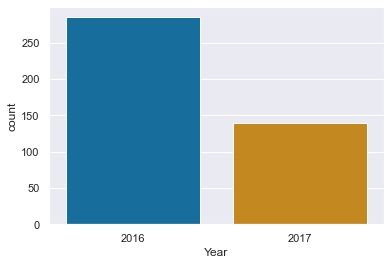

In [487]:
sns.countplot(data=df, x='Year', palette='colorblind')

Which country have highest incident?

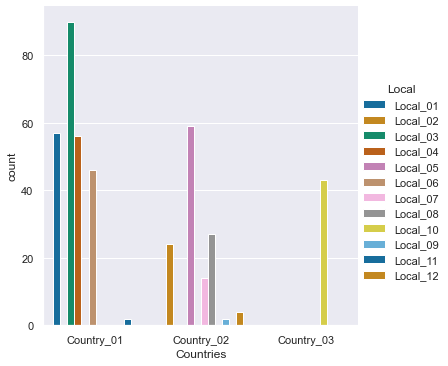

In [482]:
sns.catplot(data=df, x='Countries', hue='Local', palette='colorblind', kind='count')

Which Industry Sector?

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

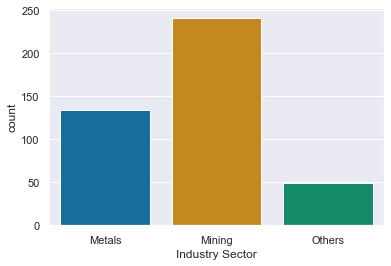

In [485]:
sns.countplot(data=df, x='Industry Sector', palette='colorblind')

Which Employee or Third Party?

<AxesSubplot:xlabel='Employee or Third Party', ylabel='count'>

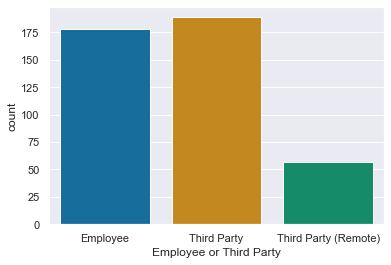

In [486]:
sns.countplot(data=df, x='Employee or Third Party', palette='colorblind')

# 4. Data preparation to be used for AIML model learning

In [501]:
# Exporting the cleaned and pre-processed data for the modelling
df.to_csv('HSE.csv', index=True)